<center>

<!-- <h1><b>Network Friendly Recommendation System</b> </h1> -->
<h1>$\textbf{Network Friendly Recommendation System}$</h1>





$\textit{Author : Antonis Kastellakis}$<br>
<br>

<h2>$\textbf{Introduction}$</h2>

A recommendation system is a technology that suggests items or content to users based on their preferences, interests, or past behavior. The primary objective of a recommendation system is to assist users in uncovering relevant and captivating items or content that they may have otherwise missed. It is commonly used in various online platforms, such as e-commerce websites, streaming services, social media platforms, and more, to provide personalized recommendations to users.

For this project, we will develop a Network-Friendly Recommendations system. The project will consist of two main parts. The objective of Part 1 is to create a simpler version of the problem that can be solved using "exact" reinforcement learning methods, without relying on neural networks or other approximation techniques. The approach will be based on MDP (Markov Decision Process) and Q-learning methods.

<h3>$\textbf{Environment (Content Catalogue)}$:</h3>

*  The content catalog consists of K content items, where initially we consider $k <=100$ to prevent potential code slowdowns.
*  To assess the relationship between each pair of items, denoted as $i$ and $j$, a random value $u_{ij}$ is generated within the range of [0, 1]. This is achieved by creating a random array $U$ with a size of $K \times K$, which can be chosen to be symmetric or asymmetric. To prevent recommending the same item that was just watched, all elements $u_{ii}$ along the diagonal are assumed to be equal to 0.
* The concept of "irrelevance" is introduced by defining a threshold value $u_{min}$ within the range of [0, 1]. Any pair of contents with a value below this threshold are considered "irrelevant." The impact of this threshold can be observed by adjusting it as an input parameter.
* Out of the total content items, $C$ are assumed to be cached, where $ C <= 0.2 K$. Cached items have a cost of 0, while non-cached items have a cost of 1.

<h3>$\textbf{Environment (User Model)}$:</h3>

* During a viewing session, a user has the possibility of watching multiple items consecutively. Once a user has finished watching a piece of content, the recommendation system suggests $N = 2$ new items to them.
* There is a probability, denoted as $q$ (input parameter), that the user decides to end the viewing session and not watch another video.
* On the other hand, with a probability of $1-q$, the user proceeds to watch one more video following these rules:
  * If <ins>ALL</ins> $N$ recommended are "relevant" (i.e., have higher $u_{ij}$ than $u_{min}$), then
    * With probability $α$ (input parameter), the user randomly selects one item from the $N$ recommended items with equal probability.
    * With probability $1-α$, the user chooses any item $k$ from the entire catalog of $K$ items, with each item having a probability $p_k$ (which can be assumed to be $\frac{1}{K}$ for simplicity, i.e., a uniform distribution).
  * If at least one of the $N$ recommendations is deemed irrelevant, the user once again selects any item $k$ from the entire catalog of $K$ items, with each item having a probability $p_k$.

 <h2>$\textbf{Algorithms}$</h2>
The algorithms powering the system will be reinforcement learning algorithms. Specifically, we will implement two algorithms, namely Policy Iteration and Q-Learning, and analyze their performance by tuning different control variables.

<h3>$\textbf{Policy Iteration}$</h3>

Policy iteration, is an iterative algorithm utilized in reinforcement learning and dynamic programming, that aims to determine the optimal policy for a given Markov Decision Process (MDP). This approach encompasses two primary steps: $\textbf{policy evaluation}$ and $\textbf{policy improvment}$. \\


<center><h4>$\textbf{1. Policy Evaluation}$</h4></center>
During this stage, the algorithm evaluates a given policy by estimating the
value function $V_{\pi}$ for that policy. The value function quantifies the expected return or total reward obtained by following a particular policy from a given state. The process starts with an initial value function estimate and iteratively updating the value estimates until they converge to the true values. This step ensures that we have a good estimate of the value function for the current policy.

The basic idea behind policy evaluation is to start with an initial value function estimate and iteratively update the estimates using the Bellman equation, which expresses the relationship between the value of a state and the values of its successor states. This process continues until the value estimates reach a steady-state or a desired level of accuracy.

The value function $V_{\pi}$ is updated using the ***Bellman expectation equation***, which is defined as follows. For any policy $\pi$ and any state s, the following consistency condition holds between the value of s and the value of its possible successor states:

$$ V_{k+1}^{\pi} (s) = \mathbb{E}_{\pi} [R_{t+1} + \gamma  V_{k}^{\pi}(s')] = \sum_{a \in \mathcal{A}} \pi (a|s) \sum_{s' \in \mathcal{S}} \mathcal{P}_{ss'}^{a} \left( \mathcal{R}_s^a + \gamma  V_{k}^{\pi}(s')  \right)$$

where $a$ is an action, $s$ is the state we are in, $s'$ is a possible next state and $\mathcal{P}_{ss'}^{a}$ is the probability of transition from state $s$ to $s'$ when we do action $a$.

<center><h4>$\textbf{2. Policy Improvement}$</h4></center>
Policy improvement entails enhancing the existing policy by leveraging the value function estimates derived from policy evaluation. The goal is to improve the policy by selecting actions that yield higher expected returns based on the value function estimates.

The policy is updated by selecting the action with the highest estimated value in each state a. This is known as the "greedy policy" or "exploitation" step.

$$ \pi'(s) = \mathop{argmax}_{a \in \mathcal{A}} q (s, a) = \mathop{argmax}_{a} \sum_{s' \in \mathcal{S}} \mathcal{P}_{ss'}^{a} \left( \mathcal{R}_s^a + \gamma  V_{k}^{\pi}(s')  \right)$$

The process involves iterating the steps of policy evaluation and policy improvement in a loop. Following each policy evaluation, the value function estimates are utilized to enhance the policy. This iteration continues until the policy converges to an optimal policy, where no further improvement is possible.

<h3>$\textbf{Q-learning (Watkins, 1989)}$</h3>

Q-learning is a reinforcement learning algorithm used to solve problems in which an agent learns to make optimal decisions based on its interaction with an environment. It is a **model-free**, off-policy algorithm that can learn to maximize long-term rewards.

In Q-learning, the agent learns to estimate the value of taking a specific action in a given state. It maintains a table called the Q-table, where each entry represents the expected cumulative reward (known as the Q-value) for a particular state-action pair.

$$ Q(s,a) ← (1-\eta) \cdot Q(s,a) + \eta \; [ \mathcal{R}_s^a + \gamma \cdot \underset{\alpha^{'} \in \mathcal{A}}{max} \; Q(s^{'},a^{'}) ]$$

where $\eta$ is the learning rate, controlling how much the agent values new information compared to existing knowledge. The learning rate is decreased over time to avoid “oscillations”. This is called the exploration-exploitation trade-off. In the beggining, the bias towards exploration stems from the agent's initial lack of knowledge. As the agent accumulates information through successive time steps, he shifts towards favoring exploitation over exploration.
Ommiting this important step can lead to the convergence of the Q-Value function to a local minimum, which often significantly deviates from the optimal Q-value function. To address this issue, we have a threshold value, gradually diminishing it in each episode through an exponential decay formula.

The learned action-value function, $Q$, directly approximates $q^*$, the optimal
action-value function, independent of the policy being followed. The policy continues to have an impact by determining which state-action pairs are visited and updated. However, for proper convergence, it is only necessary that all pairs keep being updated.

In [ ]:
# Import the necessary libraries
import numpy as np
import math
import random
import itertools
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import time
from collections import namedtuple, deque
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

In [ ]:
class RecomSys(object):
  """
  RecomSys is a class representing a recommendation system with specified parameters.
  """

  def __init__(self, K, irrelevance_thres, q, alpha, gamma = 1 , symmetric = True,  N = 2):
    """
      Initializes the recommendation system with the specified parameters.

      Parameters:
        K (int): The number of items in the content catalog.
        irrelevance_thres (float): The threshold that separates the relevant from the irrelevant content.
        q (float): The probability that the user ends the viewing session.
        alpha (float): The probability that the user selects one of the recommended items.
        gamma (float, optional): The discount factor. Default value is 1.
        symmetric (bool, optional): Indicates whether the relevance array should be symmetric or not. Default value is True.
        num_of_recom (int, optional): The number of recommended items. Default value is 2.
    """
    # Number of recommended items
    self.N = N
    # The number of items in the content cataloge
    self.K = K
    # The relevance array
    self.relevant_content = self.create_relevance_array(K, symmetric)
    # The threshold that seperates the relevant from the irrelevant content.
    self.u_min = irrelevance_thres
    # The reward of items
    self.reward = self.create_reward_array(K)
    # The number of cashed items
    self.C = math.floor(0.2*K)
    # Cashed items
    self.cashed = np.where(self.reward == 1)[0]
    # Probability that the user ends the viewing session
    self.q = q
    # Probability that the user selects one of the recommended items
    self.alpha = alpha
    # The discount factor
    self.gamma = gamma

  def create_relevance_array(self, size, symmetric):
    """
    Generates a relevance array, which is a square matrix with random values in the range [0, 1].

    Parameters:
      self: The instance of the class containing this method.
      size (int): The size of the square matrix to be generated.
      symmetric (bool): Indicates whether the relevance array should be symmetric or not.

    Returns:
      numpy.ndarray: The generated relevance array as a square matrix of size `size x size`.
    """
    # Generate a square matrix with random values in [0, 1]
    U = np.random.rand(size, size)
    # Set diagonal elements to zero
    np.fill_diagonal(U, 0)
    # The relevance array can be symmetric
    if symmetric == True:
      U = (U + U.T) / 2
    return U

  def create_reward_array(self, num_of_items):
    """
    Generates a reward array, which represents the rewards associated with each item.

    Parameters:
        self: The instance of the class containing this method.
        num_of_items (int): The total number of items for which rewards need to be generated.

    Returns:
        numpy.ndarray: The generated reward array with rewards associated with each item.
    """
    # Initialize cost array for each time
    costs = np.ones(num_of_items)
    # The number of cashed items
    C = math.floor(0.2*self.K)
    # Select random items to be cashed
    cashed = random.sample(list(range(self.K)), C)
    # Change the cost of cached items to 0
    costs[cashed] = 0
    # Due to symmetry, rewards are 1-costs
    rewards = 1 - costs
    return rewards

  def create_recommendations(self, state):
    """
    Creates a list of recommendations based on the current state.

    Parameters:
        self: The instance of the class containing this method.
        state (int): The current state or item for which recommendations need to be generated.

    Returns:
        list: The generated list of recommendations.
    """
    content = list(range(self.K))
    # We can't recommend the same item as the current one
    content.remove(state)
    # Select randomly N items to recommend
    recommendations = random.sample(content, self.N)
    return recommendations

  def generate_actions(self, state):
    """
    Generates all possible actions or recommendations for a given state.

    Parameters:
        self: The instance of the class containing this method.
        state (int): The current state or item for which actions need to be generated.

    Returns:
        list: The generated list of actions or recommendations.
    """
    items = list(range(self.K))
    # We can't recommend the same item as the current one
    items.remove(state)
    # Generate all recommendations of size N
    recom = list(itertools.combinations(items, self.N))
    return recom

  def create_random_policy(self):
    """
    Creates a random policy for each state.

    Returns:
      dict: The generated random policy.
    """
    # Generate all content/states
    content = list(range(self.K))

    # Initialize policy dictionary
    policy = {}

    # Create random policy for each state
    for state in range(self.K):
      # We can't recommend the same item as the current one
      content.remove(state)
      # Randomly suggest N items
      policy[state] = random.sample(content, self.N)
      # Include back the current state for possible future suggestions
      content.append(state)

    return policy

  def cost_of_policy(self,policy):
    """
    Calculates the cost of a given policy.

    Args:
        policy (dict): A dictionary representing the policy,
                      where keys are recommendation indices and values are recommendation items.

    Returns:
        int: The cost of the policy, representing the number of recommendations not present in the 'cashed' list.

    """
    cost = 0

    # Check all the recommendations in our policy
    recomms = policy.values()

    for item in recomms:
       cost = cost + np.sum(np.isin(item, self.cashed, invert = True))

    return cost/self.K

  def policy_evaluation(self, policy, theta = 0.0001):
    """
    Evaluates the given policy by iteratively calculating the state value function.

    Parameters:
      policy (dict): The policy to be evaluated.
      theta (float, optional): The threshold for convergence. Default value is 0.0001.

    Returns:
      numpy.ndarray: The state value function for the given policy.
    """
    # Initialize the state value function
    V = np.zeros(self.K)

    while True:
      # Change in value function
      delta = 0

      for state in range(self.K):
        # Current value for the state
        v = V[state]

        # Updated value for the state
        new_v = 0

        # Get policy for current state
        recommendations = policy[state]

        # Calculation of relevance for all recommendations
        recom_relevance = np.sum(self.relevant_content[state, recommendations] > self.u_min)

        # If ALL N recommendations are "relevant"
        if recom_relevance == self.N:
          # Calculate the value function for this state by using the Bellman equation
          # With probability a, the user randomly selects one item
          # from the N recommended items with equal probability.
          expected_return1 = sum([( 1 / self.N )*( self.reward[next_state] + self.gamma * V[next_state] ) for next_state in recommendations])

          # With probability 1−a, the user chooses any item k from the entire catalog of K items,
          # with each item having a equal probability p_k
          p_k = 1 / (self.K - 1)

          # All states but the current
          S = list(range(self.K))
          S.remove(state)

          expected_return2 = p_k * sum([ self.reward[next_state] + self.gamma * V[next_state] for next_state in S ])
          new_v = (1 - self.q) *( self.alpha * expected_return1 + (1 - self.alpha) * expected_return2)

        else:
          # If at least one of the N recommendations is deemed irrelevant,
          # the user once again selects any item k from the entire catalog of K items,
          # with each item having a probability p_k
          p_k = 1 / (self.K - 1)

          # All states but the current
          S = list(range(self.K))
          S.remove(state)

          expected_return = p_k *  sum([ self.reward[next_state] + self.gamma * V[next_state]  for next_state in S ])
          new_v = (1 - self.q) * expected_return

        # Update the value for the state
        V[state] = new_v

        # Calculate the maximum change in the value function
        delta = max(delta, abs(v - new_v))

      # Stop iteration if the maximum change is below the threshold
      if delta < theta:
        break

    # Return the value function of this policy
    return V

  def policy_improvment(self, value_function):
      """
      Improves the given value function by greedily selecting the best action for each state.

      Parameters:
          value_function (numpy.ndarray): The value function based on which policy improvement is performed.

      Returns:
          dict: The improved policy.
      """
      # Greedy policy improvment by applying one step look-ahead
      # of the Bellman optimality equation.
      policy = {}

      # Iterate over all possible actions/states
      for state in range(self.K):

        # Keep only max for each state
        max_val = -10000
        best_action = []
        # Generate all posible actions/recommendations for the current state
        all_possible_actions =  self.generate_actions(state)

        for action in all_possible_actions:
          #action_value = 0
          # Calculation of relevance for all recommendations
          recom_relevance = np.sum(self.relevant_content[state, action] > self.u_min)

          # If ALL N recommendations are "relevant"
          if recom_relevance == self.N:
            # Calculate the action value function for this state-action pair
            # by using the Bellman equation.
            # With probability a, the user randomly selects one item
            # from the N recommended items with equal probability.
            case_1 = sum([( 1 / self.N )*( self.reward[next_state] + self.gamma * value_function[next_state] ) for next_state in action])

            # With probability 1−a, the user chooses any item k from the entire catalog of K-1 items,
            # with each item having a equal probability p_k
            p_k = 1 / (self.K - 1)

            # All states but the current
            S = list(range(self.K))
            S.remove(state)

            case_2 =  p_k * sum([self.reward[next_state] + self.gamma * value_function[next_state] for next_state in S ])
            action_value = (1 - self.q) *( self.alpha * case_1 + (1 - self.alpha) * case_2)

          else:
            # If at least one of the N recommendations is deemed irrelevant,
            # the user once again selects any item k from the entire catalog of K-1 items,
            # with each item having a probability p_k
            p_k = 1 / (self.K - 1)

            # All states but the current
            S = list(range(self.K))
            S.remove(state)

            expected_return = p_k * sum([ self.reward[next_state] + self.gamma * value_function[next_state] for next_state in S ])
            action_value = (1 - self.q) * expected_return

          # We want only the pair of recommendations that maximize the Bellman action-value function
          if action_value > max_val:
            max_val = action_value
            # Each action was tuple and need to be converted to a list
            best_action = list(action)

        policy[state] = best_action

      return policy

  def policy_iteration(self):
    """
    Performs policy iteration to find the optimal policy.

    Returns:
        dict: The optimal policy.
    """
    # Initialisation by creating a random policy
    policy = self.create_random_policy()

    # Track the iterations
    iter = 0

    # Cost of initial random policy
    cost = []
    cost.append(self.cost_of_policy(policy))

    # Check for convergence
    policy_stable = False

    while policy_stable == False:
      # Evaluate current policy
      V_policy = self.policy_evaluation(policy)

      # Improve policy greedily
      new_policy = self.policy_improvment(V_policy)

      # Increse the number of iterations
      iter +=1

      # Calculate cost of new improved policy
      cost.append(self.cost_of_policy(new_policy))

      # If policy stable, then stop
      if new_policy == policy:
        policy_stable = True

      policy = new_policy.copy()

    return iter,cost,policy

  def sample_bernoulli(self, probability):
    """
    This function samples from a Bernoulli distribution.

    Parameters:
        p (float): The probability of success. It should be a value between 0 and 1.

    Returns:
        int: The sampled value from the Bernoulli distribution.
        It is either 0 or 1, representing failure and success, respectively.
    """
    if random.random() < probability:
      # Success
      return 1
    else:
      # Failure
      return 0

  def create_Q_grid(self):
    """
    Generates a Q grid containing all possible combinations of actions for each item.

    Returns:
      Q_grid (list): A 2-dimensional list representing the Q grid,
      where each element is a list of combinations.

    """
    Q_grid = []

    for i in range(self.K):
      items = list(range(self.K))
      # We can't recommend the same item as the current one
      items.remove(i)
      # Generate all recommendations of size N
      Q_grid.append(list(itertools.combinations(items, self.N)))

    return Q_grid

  def enviroment(self, current_state, action, possible_actions):
    """
    Simulates the environment and determines the next state and reward based on the current state and action.

    Parameters:
      current_state (int): The current state of the environment.
      action (list): List of recommended items for the current state.
      possible_actions (list): List of possible actions in the current state.

    Returns:
      next_state (int): The next state of the environment.
      reward (int): The reward associated with the next state.
    """
    # Calculation of relevance for all recommendations
    recom_relevance = np.sum(self.relevant_content[current_state, action] > self.u_min)

    # Make a stochastic transition based on the environment's parameters
    # If ALL N recommendations are "relevant"
    if recom_relevance == self.N:

      print(f"Our recommendations {action}, for the state {current_state} are relevant!")

      pick_recommended = self.sample_bernoulli(self.alpha)
      if pick_recommended:
        print(f"The user picked a recommended item.")
        # Transition to a recommended item with probability alpha
        next_state = np.random.choice(action)
      else:
        # Transition to any item k from the entire catalog of K-1 items
        # with probability 1-alpha
        # All states but the current
        S = list(range(self.K))
        S.remove(current_state)
        next_state = np.random.choice(S)

    else:
      print(f"Our recommendations {action}, for the state {current_state} are NOT relevant!")
      # If at least one of the N recommendations is deemed irrelevant,
      # transition once again to any item k from the entire catalog of K-1 items
      S = list(range(self.K))
      S.remove(current_state)
      next_state = np.random.choice(S)

    # Take the reward of our action
    reward = self.reward[next_state]

    return next_state, reward


  def Q_learning(self, episodes, eta = 0.001):
    """
    Performs Q-learning to learn the optimal policy for a given number of episodes.

    Parameters:
      episodes (int): The number of episodes to run the Q-learning algorithm.
      eta (float, optional): The learning rate for updating Q-values. Defaults to 0.1.

    Returns:
      policy (list): The learned optimal policy represented as a list of actions for each state.

    """
    # Initialize Q-table Q(S,A)
    Q_table = np.zeros((self.K, self.K))

    # Cost of each episode
    cost_per_episode = np.zeros(episodes)

    # For each episode
    for episode in range(episodes):

        # Reward of episode
        total_episode_reward  = 0

        # Length of episode
        steps = 0

        # Select initial state at random
        current_state = np.random.randint(self.K)

        # All posible actions from current state
        possible_actions = self.generate_actions(current_state)

        # Balance exploration and exploitation similary to epsilon greedy
        if episode < 2:
            epsilon = 1
        else:
            epsilon = min(1, ( episode**( -1/3 ) * ( self.K * np.log(episode) )**( 1/3 ) ) )

        print(f"\n----We are in episode {episode}----\n")

        # Continue session until the user quits
        while True:

            # Policy is choosen with epsilon-greedy
            # "Flip" a coin with probability epsilon
            # to decide between explore and exploit
            explore = self.sample_bernoulli(epsilon)

            if explore:
              # Exploration: Choose a random action
              choosen_action = list(random.choice(possible_actions))
              print("Exploration.")
            else:
              # Exploitation: Best action so far for the current state
              print("NOT Exploration!!!")
              # We choose the N highest actio-value elements for the current state
              choosen_action = list((-Q_table[current_state,:]).argsort()[:self.N])

            # After we select an action, the trasitions depends on the enviroment
            next_state, reward = self.enviroment(current_state, choosen_action, possible_actions)

            # Update reward of the episode
            total_episode_reward = total_episode_reward + reward
            print(f'The exploration probabilty is {epsilon}.')
            print(f'The reward for step {steps} of episode {episode} is {reward}.')
            print(f'The current state is {current_state}, while the next state is {next_state}.\n')

            # Update length of the episode
            steps = steps + 1

            # Update the Q-value for the current state-action pair
            Q_table[current_state, next_state] = ( 1 - eta ) * Q_table[current_state, next_state] + eta * ( reward + ( self.gamma * np.max( Q_table[next_state,:] ) ) )

            # If user quits session
            end_episode  = self.sample_bernoulli(self.q)
            if end_episode:
                break

            # If the episode does not end, the next state becomes the current state
            # and we repeat the same process
            current_state = next_state

            # All posible actions from current state
            possible_actions = self.generate_actions(current_state)


        # Normalize the cost by dividing it by the total length of the episode
        #cost_per_episode[episode] = (steps - total_episode_reward)/steps
        cost_per_episode[episode] = total_episode_reward/steps

    # optimal policy
    policy = {}

    for state in range(self.K):
        # Optimal policy is the one that maximizes the q value for each state
        policy[state] = list((-Q_table[state,:]).argsort()[:self.N])

    return cost_per_episode, policy

<h3>$\textbf{Model Evaluation}$</h3>

In [ ]:
def policy_heatmap(policy, cashed_items, u_min):
    """
    Creates a heatmap based on the policy dictionary, with red indicating not cashed and green indicating cashed items.

    Args:
        policy (dict): A dictionary representing the policy, where keys are recommendation indices and values are recommendation items.
        cashed_items (list or set): A list or set containing the cashed items.

    Returns:
           None. Displays the heatmap.
    """
    # Extract policy keys and values
    keys = list(policy.keys())
    values = list(policy.values())

    # Create the heatmap array
    heatmap = np.zeros((len(max(values, key=len)), len(keys)), dtype=int)

    # Define the colors
    colors = ['green']

    # Create a custom Colormap
    custom_cmap = mcolors.ListedColormap(colors)

    # Fill the heatmap array with 1 for cashed items
    for j, item_list in enumerate(values):
        for i, item in enumerate(item_list):
            if item in cashed_items:
                heatmap[i, j] = 1

    # Create the heatmap plot with numbers inside the cells
    fig, ax = plt.subplots(figsize=(20, 18))
    if np.all(heatmap == 1):
        ax.imshow(heatmap, cmap = custom_cmap)
    else:
        ax.imshow(heatmap, cmap ='RdYlGn')

    # Add number annotations inside the cells
    for j in range(len(values)):
        for i in range(len(values[j])):
            ax.text(j, i, values[j][i], ha='center', va='center')

    # Add keys to the bottom of the heatmap
    ax.set_xticks(np.arange(len(keys)))
    ax.set_xticklabels(keys)
    ax.set_xlabel('States')

    # Remove ticks and labels from the y-axis
    ax.set_yticks([])
    ax.set_ylabel('Recommendations')

    # Set the plot title
    ax.set_title(f'Policy (Umin: {u_min})')

    # Show the plot
    plt.show()

In [ ]:
def relevance_heatmap(relevance_matrix, threshold):
    """
    Creates a heatmap for the relevance matrix by applying a threshold.

    Args:
        relevance_matrix (numpy.ndarray): 2D array representing the relevance matrix.
        threshold (float): The threshold value for determining cyan or magenta color.

    Returns:
        None. Displays the heatmap plot.

    """

    # Apply threshold to the relevance matrix
    masked_matrix = np.where(relevance_matrix > threshold, 1, 0)

    # Create the colormap with cyan and magenta colors
    cmap = plt.cm.colors.ListedColormap(['Purple', 'Yellow'])

    # Create the heatmap plot
    plt.imshow(masked_matrix, cmap=cmap, interpolation='nearest')

    # Add title with threshold value
    plt.title(f"Relevance Matrix (Umin: {threshold})")

    # Show the plot
    plt.show()

In [ ]:
from prettytable import PrettyTable

def print_rewards(reward_history, group_size=1000):
    """
    Calculate and print the mean reward for every 1000 episodes in a reward history.

    Parameters:
    reward_history (array-like): A list or NumPy array containing rewards obtained in each episode.
    group_size (int, optional): The number of episodes in each group to calculate the mean.
    """

    # Create a table
    table = PrettyTable()
    table.field_names = ["Episode Range", "Mean Reward"]

    for i in range(0, len(reward_history), group_size):
        group = reward_history[i:i + group_size]
        lower_bound = i + 1
        upper_bound = i + group_size
        mean_reward = np.mean(group)
        episode_range = f"{lower_bound}-{upper_bound}"
        table.add_row([episode_range, f"{mean_reward:.4f}"])

    print(f"Mean reward per {group_size} episodes.")
    print(table)

<h2>$\textbf{Experiments}$</h2>

<h3>$\textbf{Policy Iteration Evaluation}$</h3>

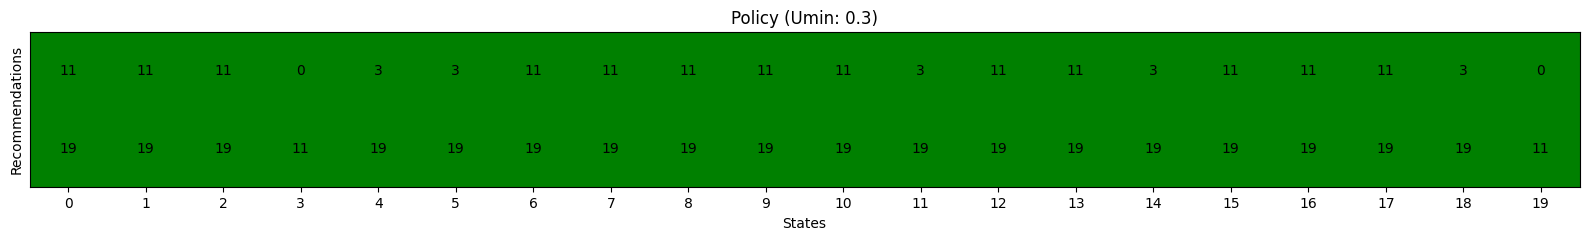


The cashed items are [ 0  3 11 19].


In [ ]:
# Define parameters for the recommendation system
params = {
    'K': 20,               # Number of states
    'irrelevance_thres': 0.3,  # Irrelevance threshold
    'q': 0.2,              # Quit probability
    'alpha': 0.8           # Probability of the user to follow a recommendation
}

# Create an instance of the RecomSys class with the defined parameters
rec1 = RecomSys(**params)

# Perform policy iteration to learn a policy
iter1, cost_per_iter1, Policy_Iteration_policy1 = rec1.policy_iteration()

# Visualize the learned policy as a heatmap
policy_heatmap(Policy_Iteration_policy1, list(rec1.cashed), rec1.u_min)

# Print the cashed items
print(f"\nThe cashed items are {rec1.cashed}.")


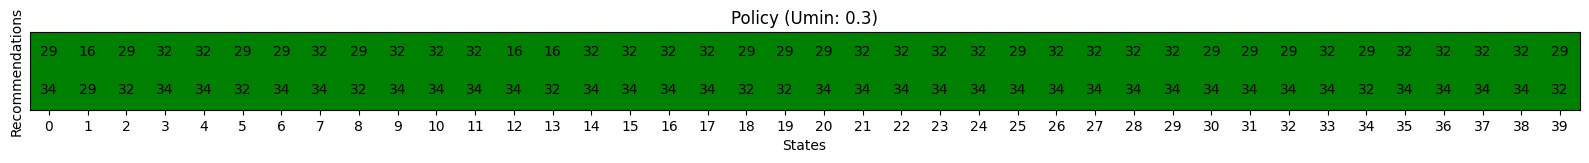


The cashed items are [ 0  1  4  7 16 29 32 34].


In [ ]:
# Define parameters for the second recommendation system
params = {
    'K': 40,               # Number of states
    'irrelevance_thres': 0.3,  # Irrelevance threshold
    'q': 0.2,              # Quit probability
    'alpha': 0.9           # Probability of the user to follow a recommendation
}

# Create an instance of the RecomSys class with the new parameters
rec2 = RecomSys(**params)

# Perform policy iteration to learn a policy for the second recommendation system
iter2, cost_per_iter2, Policy_Iteration_policy2 = rec2.policy_iteration()

# Visualize the learned policy as a heatmap for the second recommendation system
policy_heatmap(Policy_Iteration_policy2, list(rec2.cashed), rec2.u_min)

# Print the cashed items for the second recommendation system
print(f"\nThe cashed items are {rec2.cashed}.")


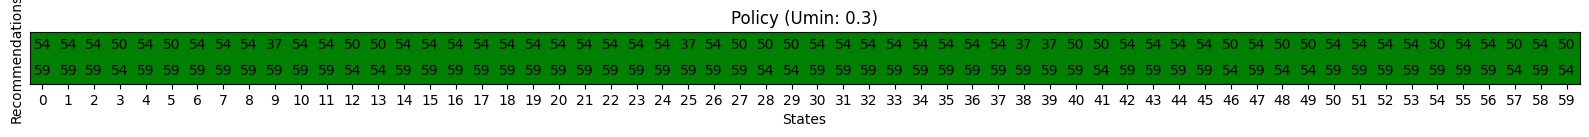


The cashed items are [ 0  9 23 26 29 31 37 40 46 50 54 59].


In [ ]:
# Define parameters for the third recommendation system
params = {
    'K': 60,              # Number of states
    'irrelevance_thres': 0.3,  # Irrelevance threshold
    'q': 0.2,              # Quit probability
    'alpha': 0.9           # Probability of the user to follow a recommendation
}

# Create an instance of the RecomSys class with the new parameters
rec3 = RecomSys(**params)

# Perform policy iteration to learn a policy for the third recommendation system
iter3, cost_per_iter3, Policy_Iteration_policy3 = rec3.policy_iteration()

# Visualize the learned policy as a heatmap for the third recommendation system
policy_heatmap(Policy_Iteration_policy3, list(rec3.cashed), rec3.u_min)

# Print the cashed items for the third recommendation system
print(f"\nThe cashed items are {rec3.cashed}.")


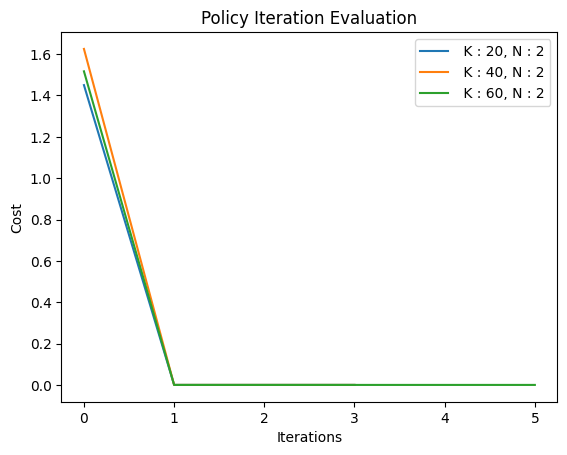

In [ ]:
# Plot the costs for each model
plt.plot(cost_per_iter1, label=f' K : {rec1.K}, N : {rec1.N}')
plt.plot(cost_per_iter2, label=f' K : {rec2.K}, N : {rec2.N}')
plt.plot(cost_per_iter3, label=f' K : {rec3.K}, N : {rec3.N}')

# Set plot title and labels
plt.title('Policy Iteration Evaluation')
plt.xlabel('Iterations')
plt.ylabel('Cost')

# Add legend
plt.legend()

# Show the plot
plt.show()

<h3>$\textbf{Q-learning Evaluation}$</h3>

In [ ]:
# Number of episodes for Q-learning training
episodes = 100000
# Learn policy by running episodes
average_cost1, Q_learning_policy1= rec1.Q_learning(episodes,eta = 0.001)

Streaming output truncated to the last 5000 lines.

NOT Exploration!!!
Our recommendations [19, 11], for the state 13 are relevant!
The exploration probabilty is 0.13211160485836518.
The reward for step 1 of episode 99847 is 0.0.
The current state is 13, while the next state is 14.


----We are in episode 99848----

NOT Exploration!!!
Our recommendations [19, 3], for the state 18 are relevant!
The user picked a recommended item.
The exploration probabilty is 0.13211120212809674.
The reward for step 0 of episode 99848 is 1.0.
The current state is 18, while the next state is 19.


----We are in episode 99849----

NOT Exploration!!!
Our recommendations [0, 11], for the state 3 are relevant!
The user picked a recommended item.
The exploration probabilty is 0.132110799403056.
The reward for step 0 of episode 99849 is 1.0.
The current state is 3, while the next state is 0.

Exploration.
Our recommendations [7, 16], for the state 0 are NOT relevant!
The exploration probabilty is 0.13211079940

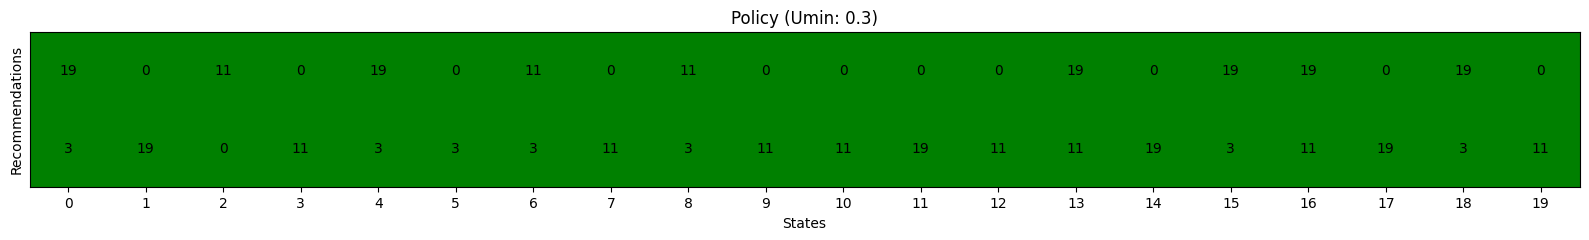

In [ ]:
# Visualize the learned policy as a heatmap for the third recommendation system
policy_heatmap(Q_learning_policy1, list(rec1.cashed), rec1.u_min)

In [ ]:
print_rewards(average_cost1, 5000)

Mean reward per 5000 episodes.
+---------------+-------------+
| Episode Range | Mean Reward |
+---------------+-------------+
|     1-5000    |    0.5395   |
|   5001-10000  |    0.6460   |
|  10001-15000  |    0.6724   |
|  15001-20000  |    0.6848   |
|  20001-25000  |    0.6998   |
|  25001-30000  |    0.7116   |
|  30001-35000  |    0.7189   |
|  35001-40000  |    0.7247   |
|  40001-45000  |    0.7196   |
|  45001-50000  |    0.7320   |
|  50001-55000  |    0.7355   |
|  55001-60000  |    0.7432   |
|  60001-65000  |    0.7372   |
|  65001-70000  |    0.7367   |
|  70001-75000  |    0.7399   |
|  75001-80000  |    0.7393   |
|  80001-85000  |    0.7478   |
|  85001-90000  |    0.7435   |
|  90001-95000  |    0.7458   |
|  95001-100000 |    0.7454   |
+---------------+-------------+


In [ ]:
# Learn policy by running episodes
average_cost2, Q_learning_policy2 = rec2.Q_learning(episodes, eta = 0.001)

Streaming output truncated to the last 5000 lines.
Our recommendations [4, 34], for the state 30 are relevant!
The user picked a recommended item.
The exploration probabilty is 0.16644055226409082.
The reward for step 0 of episode 99866 is 1.0.
The current state is 30, while the next state is 34.

NOT Exploration!!!
Our recommendations [7, 4], for the state 34 are relevant!
The user picked a recommended item.
The exploration probabilty is 0.16644055226409082.
The reward for step 1 of episode 99866 is 1.0.
The current state is 34, while the next state is 4.

NOT Exploration!!!
Our recommendations [7, 16], for the state 4 are relevant!
The user picked a recommended item.
The exploration probabilty is 0.16644055226409082.
The reward for step 2 of episode 99866 is 1.0.
The current state is 4, while the next state is 16.

NOT Exploration!!!
Our recommendations [7, 34], for the state 16 are relevant!
The user picked a recommended item.
The exploration probabilty is 0.16644055226409082.
The r

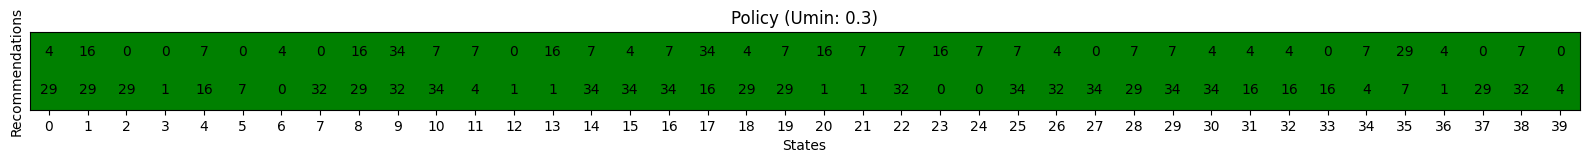

In [ ]:
# Visualize the learned policy as a heatmap for the third recommendation system
policy_heatmap(Q_learning_policy2, list(rec2.cashed), rec2.u_min)

In [ ]:
print_rewards(average_cost2, 5000)

Mean reward per 5000 episodes.
+---------------+-------------+
| Episode Range | Mean Reward |
+---------------+-------------+
|     1-5000    |    0.5139   |
|   5001-10000  |    0.6590   |
|  10001-15000  |    0.6922   |
|  15001-20000  |    0.7139   |
|  20001-25000  |    0.7331   |
|  25001-30000  |    0.7435   |
|  30001-35000  |    0.7483   |
|  35001-40000  |    0.7534   |
|  40001-45000  |    0.7749   |
|  45001-50000  |    0.7724   |
|  50001-55000  |    0.7769   |
|  55001-60000  |    0.7659   |
|  60001-65000  |    0.7791   |
|  65001-70000  |    0.7770   |
|  70001-75000  |    0.7818   |
|  75001-80000  |    0.7880   |
|  80001-85000  |    0.7972   |
|  85001-90000  |    0.7982   |
|  90001-95000  |    0.7891   |
|  95001-100000 |    0.7978   |
+---------------+-------------+


In [ ]:
# Learn policy by running episodes
average_cost3, Q_learning_policy3 = rec3.Q_learning(episodes, eta = 0.001)

Streaming output truncated to the last 5000 lines.


----We are in episode 99875----

NOT Exploration!!!
Our recommendations [0, 37], for the state 59 are relevant!
The user picked a recommended item.
The exploration probabilty is 0.19052164473745936.
The reward for step 0 of episode 99875 is 1.0.
The current state is 59, while the next state is 37.


----We are in episode 99876----

Exploration.
Our recommendations [19, 38], for the state 5 are relevant!
The user picked a recommended item.
The exploration probabilty is 0.19052106411094938.
The reward for step 0 of episode 99876 is 0.0.
The current state is 5, while the next state is 19.

NOT Exploration!!!
Our recommendations [0, 26], for the state 19 are relevant!
The user picked a recommended item.
The exploration probabilty is 0.19052106411094938.
The reward for step 1 of episode 99876 is 1.0.
The current state is 19, while the next state is 26.

NOT Exploration!!!
Our recommendations [29, 37], for the state 26 are relevant!
The ex

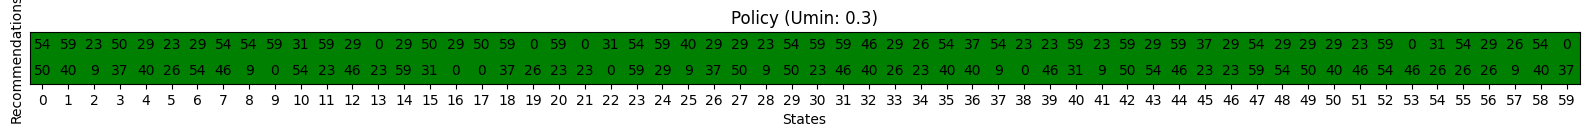

In [ ]:
# Visualize the learned policy as a heatmap for the third recommendation system
policy_heatmap(Q_learning_policy3, list(rec3.cashed), rec3.u_min)

In [ ]:
print_rewards(average_cost3,5000)

Mean reward per 5000 episodes.
+---------------+-------------+
| Episode Range | Mean Reward |
+---------------+-------------+
|     1-5000    |    0.4670   |
|   5001-10000  |    0.6184   |
|  10001-15000  |    0.6565   |
|  15001-20000  |    0.6810   |
|  20001-25000  |    0.6960   |
|  25001-30000  |    0.7112   |
|  30001-35000  |    0.7180   |
|  35001-40000  |    0.7323   |
|  40001-45000  |    0.7455   |
|  45001-50000  |    0.7435   |
|  50001-55000  |    0.7518   |
|  55001-60000  |    0.7496   |
|  60001-65000  |    0.7513   |
|  65001-70000  |    0.7648   |
|  70001-75000  |    0.7665   |
|  75001-80000  |    0.7689   |
|  80001-85000  |    0.7736   |
|  85001-90000  |    0.7692   |
|  90001-95000  |    0.7765   |
|  95001-100000 |    0.7830   |
+---------------+-------------+


<h3>$\textbf{Deep Q-Networks}$</h3>

Up until now, we've utilized a lookup table to represented the value function. In this table, each state $s$ is associated with a corresponding entry, denoted as $V(s)$, or every state-action pair $s$, $a$ has an entry $Q(s,a)$. However, when dealing with large Markov Decision Processes (MDPs), a couple of challenges emerge. Primarily, the sheer volume of states and/or actions becomes impractical to store in memory. Additionally, the process of learning the value of each state individually takes an excessively long time.

Solution? Instead of a table, we have a parametrized Q function, that has the flexibility to either adopt a linear structure based on features or take on a non-linear form, such as a neural network or a decision tree, among others.

The Deep Q-Network (DQN) is a reinforcement learning technique that integrates Q-learning with deep neural networks. It's employed in environments with discrete states and actions, such as games or control tasks. DQN employs a neural network to approximate the Q-function, which estimates the cumulative future rewards of taking actions in specific states.

<h5>$\textbf{Replay Memory}$</h5>

A crucial element of DQN is the introduction of an experience replay buffer, which effectively stores the observed agent transitions, enabling us to recycle this data in the future. By randomly selecting samples from this memory, we ensure that the transitions used to create a batch are uncorrelated. This approach has been demonstrated to significantly enhance the stability and effectiveness of the DQN training process.

For this, we’re going to need the following:

* **Transition** - a named tuple representing a single transition in our environment. It essentially maps (state, action) pairs to their (next_state, reward) result, with the state being the screen difference image as described later on.

* **ReplayMemory** - a cyclic buffer of bounded size that holds the transitions observed recently. It also implements a .sample() method for selecting a random batch of transitions for training.

<h5>$\textbf{Training a DQN}$</h5>

During training, DQN follows an epsilon-greedy policy to explore the environment. With probability ε (exploration rate), the agent chooses a random action, and with probability 1-ε, it selects the action with the highest Q-value according to the current Q-network.  The core of DQN's training process involves minimizing the loss between predicted and target Q-values, where the target Q-value is computed using the Bellman equation. To minimize this error, we will use the Huber loss. The Huber loss acts like the mean squared error when the error is small, but like the mean absolute error when the error is large - this makes it more robust to outliers when the estimates of Q are very noisy. We calculate this over a batch of transitions, $B$, sampled from the replay memory,

$$ \mathcal{L} = \frac{1}{|B|} \sum_{(s,a,s',r) \; \in \; B } \mathcal{L} (\delta) $$

$$ \text{where } \mathcal{L}(\delta) =
\begin{cases}
\frac{1}{2} \delta^2 \quad, \text{for } |\delta| \leq 1\\
|\delta| - \frac{1}{2} \, , {else}
\end{cases}$$

The target Q-value for a state-action pair is computed as,

$$\text{Target Q}(s, a) = r + γ \cdot \text{max Q}(s', a')$$

where max Q$(s', a')$ represents the maximum Q-value among possible actions in the next state s'.

Experience replay batches are sampled periodically to update the Q-network through gradient descent. To enhance stability, DQN uses a separate target network that lags behind the primary Q-network. This target network is used to compute the target Q-values during training. The target network's weights are updated less frequently or with a soft update.

In [ ]:
# Define a named tuple to represent a sample of experience
Transition = namedtuple('Transition',
                        ('state', 'action', 'next_state', 'reward'))


class ReplayMemory(object):
    def __init__(self, capacity):
        """
        Initialize a ReplayMemory object with a specified capacity.

        Args:
            capacity (int): The maximum number of transitions to store.
        """
        self.memory = deque([], maxlen=capacity)

    def push(self, *args):
        """
        Save a transition into the memory.

        Args:
            *args: A variable-length argument list representing a transition,
                   typically (state, action, next_state, reward).
        """
        self.memory.append(Transition(*args))

    def sample(self, batch_size):
        """
        Randomly sample a batch of transitions from the memory.

        Args:
            batch_size (int): The number of transitions to sample.

        Returns:
            list: A list of sampled transitions.
        """
        return random.sample(self.memory, batch_size)

    def __len__(self):
        """
        Get the current number of transitions stored in the memory.

        Returns:
            int: The current number of transitions.
        """
        return len(self.memory)

In [ ]:
class DQN(nn.Module):
    """
    DQN (Deep Q-Network) is a class representing a neural network model used in reinforcement learning.
    It's designed for approximating Q-values of different actions given input observations.

    Parameters:
    n_observations (int): Number of observation inputs.
    n_actions (int): Number of possible actions.

    Methods:
    - forward(x): Defines the forward pass of the neural network.
    """

    def __init__(self, num_of_items, n_actions):
        """
        Initializes the DQN model with the specified number of observations and actions.

        Parameters:
        num_of_items (int): Number of input items.
        n_actions (int): Number of possible actions.
        """
        super(DQN, self).__init__()
        self.layer1 = nn.Embedding(num_of_items, 128, sparse=True)
        #self.layer2 = nn.Linear(64, 128)
        self.layer3 = nn.Linear(128, n_actions)

    def forward(self, x):
        """
        Defines the forward pass of the neural network.

        Parameters:
        x (Tensor): Input tensor representing observations.

        Returns:
        Tensor: Output tensor representing Q-values for different actions.
        """
        x = F.sigmoid(self.layer1(x))
        #x = F.sigmoid(self.layer2(x))
        return self.layer3(x)


In [ ]:
class MultipleOptimizer(object):
    def __init__(self, *op):
        """
        Initialize the MultipleOptimizer with a variable number of optimizers.

        Args:
            *op: Variable number of optimizers to be managed.
        """
        self.optimizers = op

    def zero_grad(self):
        """
        Zero out the gradients for all the optimizers in the collection.

        Note:
            This sets the gradients of all parameters to zero.
        """
        for op in self.optimizers:
            op.zero_grad(set_to_none=True)

    def step(self):
        """
        Take an optimization step for all the optimizers in the collection.

        Note:
            This typically performs parameter updates using each optimizer's
            optimization algorithm.
        """
        for op in self.optimizers:
            op.step()

In [ ]:
class RecomSysApprox(RecomSys):

    def select_action(self, state_tensor, input_tensor, epsilon, device, policy_net):
        """
        Select an action using an epsilon-greedy policy.

        Args:
            state_tensor (torch.Tensor): Tensor representing the current state.
            input_tensor (torch.Tensor): Tensor containing input information.
            K (int): Number of possible actions.
            N (int): Number of actions to select.
            epsilon (float): Exploration-exploitation trade-off parameter.
            device (torch.device): The device (e.g., 'cpu' or 'cuda') for tensor operations.
            policy_net (DQN): The policy network used for action selection.

        Returns:
            torch.Tensor: Tensor containing the selected actions.
        """

        # Policy is chosen with epsilon-greedy
        # "Flip" a coin with probability epsilon
        # to decide between explore and exploit
        explore = self.sample_bernoulli(epsilon)

        if explore:
            # Exploration: Choose a random action
            items = list(range(self.K))
            # We can't recommend the same item as the current one
            items.remove(self.current_state)
            action = np.random.choice(items, self.N, replace=False)
            recommendations = torch.tensor(action, device=device)
        else:
            # Select the action with the highest Q-value from the policy network
            with torch.no_grad():
                q_values = policy_net.forward(input_tensor)

            # Set Q-values for the current state to negative infinity to exclude them from selection
            q_values[state_tensor] = -np.inf

            # Select the top-N actions with the highest Q-values
            _, recommendations = q_values.topk(self.N)

        return recommendations


    def enviroment_step(self, action):
        """
        Simulate an environment step based on the selected action.

        Args:
            action: The selected action.

        Returns:
            next_state: The next state after taking the action.
            reward: The reward received for the action.
            quit_session: A flag indicating if the session ended.
        """
        quit_session = False

        # Calculate relevance of recommended items
        recom_relevance = np.sum(self.relevant_content[self.current_state, action] > self.u_min)

        # Make a stochastic transition based on the environment's parameters
        # If ALL N recommendations are "relevant"
        if recom_relevance == self.N :
            # Check if the user chooses a recommended item
            pick_recommended = self.sample_bernoulli(self.alpha)
            if pick_recommended:
                next_state = np.random.choice(action)
            else:
                # User chooses any item from the entire catalog with uniform probability
                next_state = np.random.randint(self.K)
        else:
            # User chooses any item from the entire catalog with uniform probability
            next_state = np.random.randint(self.K)


        # If user quits session
        end_episode  = self.sample_bernoulli(self.q)
        if end_episode:
          quit_session = True

        # Take the reward of our action
        reward = self.reward[next_state]

        self.current_state = next_state

        return next_state, reward, quit_session

    def optimise_model(self, policy_net, target_net, optimizer, memory, batch_size, gamma, device):
        """
        Optimize the Q-network model using experience replay.

        Args:
            policy_net (DQN): The policy network.
            target_net (DQN): The target network.
            optimizer: The optimizer for model updates.
            memory: Replay memory containing experiences.
            batch_size (int): Size of the mini-batch for experience replay.
            gamma (float): Discount factor for future rewards in Q-learning.
            device (torch.device): The device for tensor operations.
        """
        # Sample a batch of experiences from the memory buffer
        transitions = memory.sample(batch_size)
        batch = Transition(*zip(*transitions))

        # Convert batch components to tensors and move to the specified device
        state_batch = torch.cat(batch.state).to(device)
        action_batch = torch.stack(batch.action, dim=0).to(device)
        reward_batch = torch.cat(batch.reward).to(device)

        # Compute the Q-values for the current state-action pairs from the policy network
        state_action_values = torch.mean(policy_net(state_batch).gather(1, action_batch), 1)

        # Create a mask to identify non-final next states
        non_final_mask = torch.tensor(tuple(map(lambda s: s is not None, batch.next_state)), device=device, dtype=torch.bool)
        non_final_next_states = torch.cat([s for s in batch.next_state if s is not None])

        # Compute the Q-values for the next state-action pairs from the target network
        next_state_values = torch.zeros(batch_size, device=device)
        next_state_input_batch = non_final_next_states.view(-1, 1).squeeze(1).to(device)
        next_state_values[non_final_mask] = torch.mean(torch.topk(target_net.forward(next_state_input_batch), self.N, dim=1)[0], 1)

        # Compute the expected Q-values using the Bellman equation
        expected_state_action_values = (next_state_values * gamma) + reward_batch
        expected_state_action_values = expected_state_action_values.detach()

        # Compute the loss using Huber loss (smooth L1 loss)
        loss = nn.functional.smooth_l1_loss(state_action_values, expected_state_action_values)

        # Zero the gradients, perform backward pass, and update model weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


    def get_policy(self, policy_net, device):
        """
        Get the policy as a dictionary of recommendations.

        Args:
            K (int): Number of states/actions.
            N (int): Number of recommendations to make.
            policy_net (DQN): The policy network.
            device (torch.device): The device for tensor operations.

        Returns:
            dict: A dictionary containing recommendations for each state.
        """
        policy = {}
        # Create a tensor for all states
        state_tensors = torch.arange(self.K, dtype=torch.long, device=device).unsqueeze(0)

        # Initialize a list to store input tensors
        inputs = []

        for state in range(self.K):
            #input = np.insert(self.relevant_content[state], 0, state)
            inputs.append(state)

        # Convert the list of inputs to a tensor
        input_tensors = torch.tensor(inputs, dtype=torch.long, device=device)

        with torch.no_grad():
            # Compute Q-values
            q_values = policy_net(input_tensors)

        # Set Q-values for the current state to -inf
        q_values[state_tensors, state_tensors] = -np.inf

        # Get the top-N recommendations
        _, recommendations = q_values.topk(self.N)
        # Convert recommendations tensor to a NumPy array
        recommendations_np = recommendations.cpu().numpy()

        for state, recs in enumerate(recommendations_np):
            policy[state] = recs

        return policy

    def policy_cost(self, policy):
        """
        Calculate the cost of a recommendation policy.

        Args:
            policy (dict): A dictionary containing recommendations for each state.

        Returns:
            float: The normalized cost of the policy.
        """
        # Initialize the cost to 0
        cost = 0

        # Iterate over the recommendations in the policy
        for recomms in policy.values():
            for item in recomms.tolist():
                # Count the number of items in the recommendation that are not in the cache
                cost += np.sum(np.isin(item, self.cashed, invert=True))

        # Normalize the cost by dividing it by the total number of action space items
        return cost / (self.K*self.N)



    def dqn_train(self, batch_size, gamma, num_episodes, TAU):
        """
        Train a Deep Q-Network (DQN) for reinforcement learning.

        Args:
            N (int): Number of recommendations to make.
            batch_size (int): Size of the mini-batch for experience replay.
            gamma (float): Discount factor for future rewards in Q-learning.
            num_episodes (int): Number of episodes for training.
            TAU (float): Soft update parameter for the target network.

        Returns:
            policy_net (DQN): The trained policy network.
            rewards_per_episode (list): List of rewards per episode during training.
            cost_per_episode (list): List of costs per episode during training.
        """
        # Define action space, which is equal to state space K
        state_dim = self.K
        action_dim = self.K

        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

        # Initialize the policy network and target network
        policy_net = DQN(state_dim, action_dim).to(device)
        target_net = DQN(state_dim, action_dim).to(device)
        target_net.load_state_dict(policy_net.state_dict())

        # Define the optimizer (SparseAdam + AdamW) and experience replay memory
        optimizer = MultipleOptimizer(
            optim.SparseAdam(list(policy_net.parameters())[:1], lr=1e-4),
            optim.AdamW(list(policy_net.parameters())[1:], lr=1e-4)
        )

        memory = ReplayMemory(10000)

        # Initialize other variables
        cost_per_episode = []

        # For each episode
        for episode in range(num_episodes):

            # Select initial state at random
            state = np.random.randint(self.K)
            self.current_state = state
            state_tensor = torch.tensor(state, dtype=torch.long, device=device).unsqueeze(0)

            # Balance exploration and exploitation similarly to epsilon greedy
            if episode == 0:
                epsilon = 1
            else:
                epsilon = min(1, ( episode**( -1/3 ) * ( self.K * np.log(episode) )**( 1/3 ) ) )

            quit_session = False

            while not quit_session:

                # Select an action using epsilon-greedy policy
                input_tensor = torch.tensor(state, dtype=torch.long, device=device)
                action = self.select_action(state_tensor, input_tensor, epsilon, device, policy_net)

                # Take a step in the environment and observe reward and next state
                next_state, reward, quit_session = self.enviroment_step(action.cpu())
                reward = torch.tensor(reward, device=device).unsqueeze(0)
                next_state = torch.tensor(next_state, dtype=torch.long, device=device).unsqueeze(0)

                # Store experience in memory
                memory.push(state_tensor, action, next_state, reward)

                # Move to the next state
                state_tensor = next_state

                # Perform one step of the optimization (on the policy network), if enough experiences are available
                if len(memory) >= batch_size:
                    self.optimise_model(policy_net, target_net, optimizer, memory, batch_size, gamma, device)

            # Soft update of the target network's weights
            # theta′ ← tau * theta + (1 − tau)*theta′
            # https://ai.stackexchange.com/questions/21485/how-and-when-should-we-update-the-q-target-in-deep-q-learning
            target_net_state_dict = target_net.state_dict()
            policy_net_state_dict = policy_net.state_dict()
            for key in policy_net_state_dict:
                target_net_state_dict[key] = policy_net_state_dict[key] * TAU + target_net_state_dict[key] * (1 - TAU)
            target_net.load_state_dict(target_net_state_dict)

            # Store the total cost for the episode
            policy = self.get_policy( policy_net, device)
            avg_episode_cost = self.policy_cost(policy)
            cost_per_episode.append(avg_episode_cost)

        return  cost_per_episode, policy


<h3>$\textbf{Experiments - DQN Evaluation}$</h3>

<h3>$\textbf{Effect of relevance threshold }$ $\mathbf{U_{min}}$ $\textbf{ on policy}$</h3>

In [ ]:
# Define parameters for the recommendation system
params = {
    'K': 30,                 # Number of states
    'irrelevance_thres': 0.1, # Irrelevance threshold
    'q': 0.1,                 # Quit probability
    'alpha': 0.8,             # Exploration rate
    'N': 3                   # Number of recommendations to make
}

# Create an instance of the RecomSysApprox class with the defined parameters
recApprox = RecomSysApprox(**params)

# Define parameters for training the recommendation system
training_params = {
    'batch_size': 64,      # Batch size for training
    'gamma': 0.99,         # Discount factor
    'num_episodes': 1000,  # Number of training episodes
    'TAU': 0.005           # Soft update parameter for the target network
}

# Train the recommendation system using DQN and collect training statistics
DQN_cost_per_episode, DQN_policy = recApprox.dqn_train(**training_params)


In [ ]:
recApprox.cashed

array([ 3, 12, 14, 17, 23, 29])

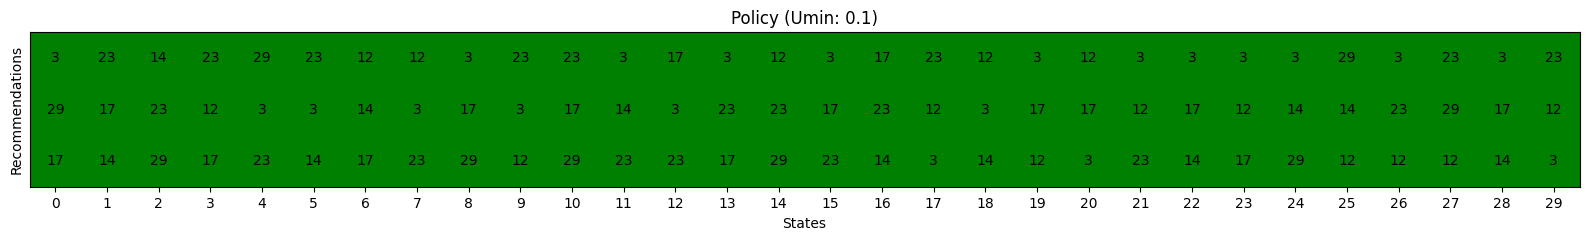

In [ ]:
policy_heatmap(DQN_policy, list(recApprox.cashed), recApprox.u_min)

In [ ]:
# Define parameters for the recommendation system
params = {
    'K': 30,                 # Number of states
    'irrelevance_thres': 0.5, # Irrelevance threshold
    'q': 0.1,                 # Quit probability
    'alpha': 0.8,             # Exploration rate
    'N': 3                   # Number of recommendations to make
}

# Create an instance of the RecomSysApprox class with the defined parameters
recApprox2 = RecomSysApprox(**params)

# Define parameters for training the recommendation system
training_params = {
    'batch_size': 64,      # Batch size for training
    'gamma': 0.99,         # Discount factor
    'num_episodes': 1000,  # Number of training episodes
    'TAU': 0.005           # Soft update parameter for the target network
}

# Train the recommendation system using DQN and collect training statistics
DQN_cost_per_episode2, DQN_policy2 = recApprox2.dqn_train(**training_params)

In [ ]:
recApprox2.cashed

array([ 6, 12, 13, 17, 19, 27])

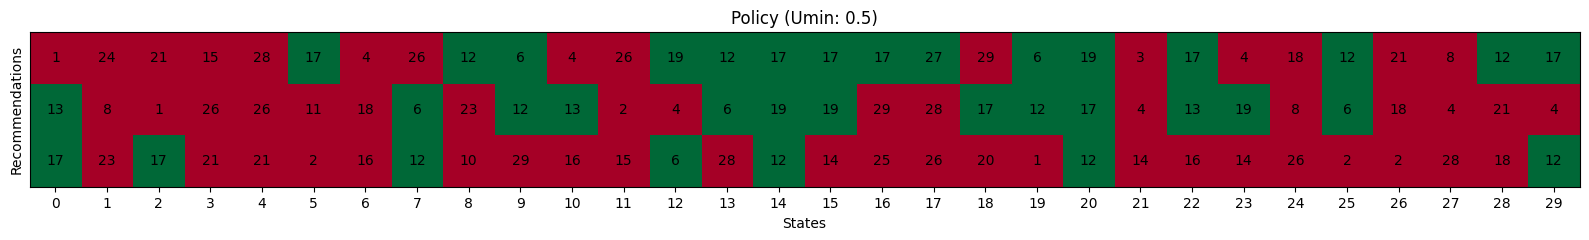

In [ ]:
policy_heatmap(DQN_policy2, list(recApprox2.cashed), recApprox2.u_min)

In [ ]:
# Define parameters for the recommendation system
params = {
    'K': 30,                 # Number of states
    'irrelevance_thres': 0.9, # Irrelevance threshold
    'q': 0.1,                 # Quit probability
    'alpha': 0.8,             # Exploration rate
    'N': 3                   # Number of recommendations to make
}

# Create an instance of the RecomSysApprox class with the defined parameters
recApprox3 = RecomSysApprox(**params)

# Define parameters for training the recommendation system
training_params = {
    'batch_size': 64,      # Batch size for training
    'gamma': 0.99,         # Discount factor
    'num_episodes': 1000,  # Number of training episodes
    'TAU': 0.005           # Soft update parameter for the target network
}

# Train the recommendation system using DQN and collect training statistics
DQN_cost_per_episode3, DQN_policy3 = recApprox3.dqn_train(**training_params)

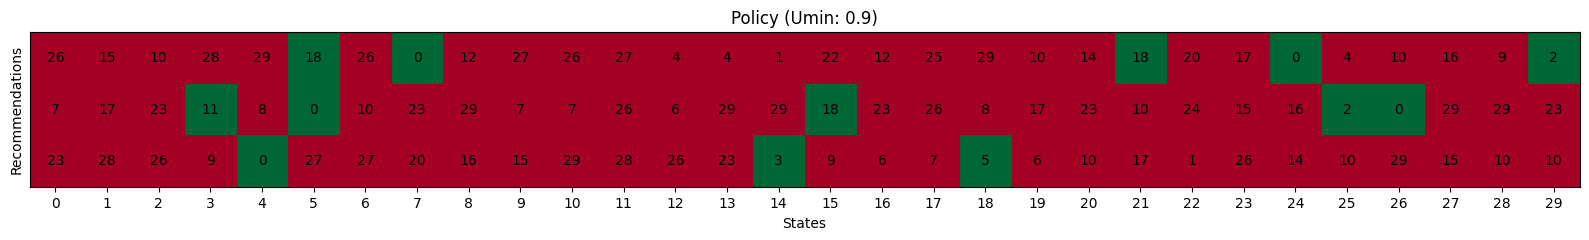

In [ ]:
policy_heatmap(DQN_policy3, list(recApprox3.cashed), recApprox3.u_min)

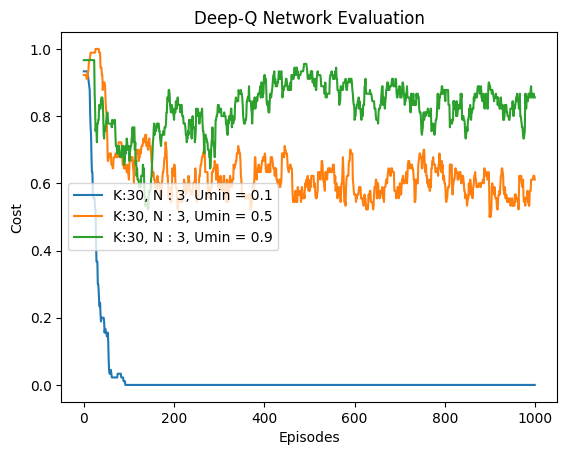

In [ ]:
# Plot the costs for each model
plt.plot(DQN_cost_per_episode, label = f'K:{recApprox.K}, N : {recApprox.N}, Umin = {recApprox.u_min}')
plt.plot(DQN_cost_per_episode2, label = f'K:{recApprox2.K}, N : {recApprox2.N}, Umin = {recApprox2.u_min}')
plt.plot(DQN_cost_per_episode3, label = f'K:{recApprox3.K}, N : {recApprox3.N}, Umin = {recApprox3.u_min}')

# Set plot title and labels
plt.title('Deep-Q Network Evaluation')
plt.xlabel('Episodes')
plt.ylabel('Cost')

# Add legend
plt.legend()

# Show the plot
plt.show()

<h3>$\textbf{Effect of the state space K on policy}$</h3>

In [ ]:
# Define parameters for the recommendation system
params = {
    'K': 20,                 # Number of states
    'irrelevance_thres': 0.4, # Irrelevance threshold
    'q': 0.1,                 # Quit probability
    'alpha': 0.8,             # Exploration rate
    'N': 3                   # Number of recommendations to make
}

# Create an instance of the RecomSysApprox class with the defined parameters
recApprox = RecomSysApprox(**params)

# Define parameters for training the recommendation system
training_params = {
    'batch_size': 64,      # Batch size for training
    'gamma': 0.99,         # Discount factor
    'num_episodes': 1000,  # Number of training episodes
    'TAU': 0.005           # Soft update parameter for the target network
}

# Train the recommendation system using DQN and collect training statistics
DQN_cost_per_episode, DQN_policy = recApprox.dqn_train(**training_params)


In [ ]:
recApprox.cashed

array([ 0,  9, 14, 17])

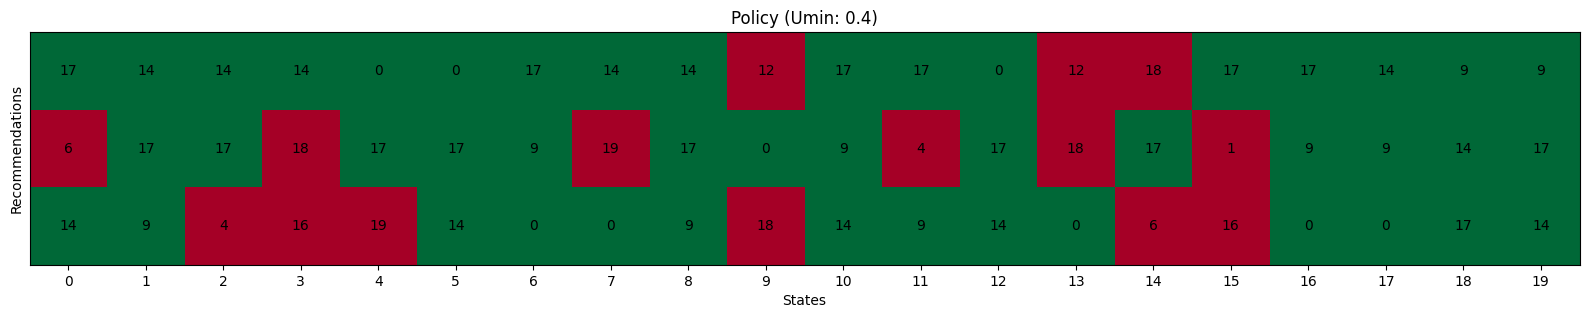

In [ ]:
policy_heatmap(DQN_policy, list(recApprox.cashed), recApprox.u_min)

In [ ]:
# Define parameters for the recommendation system
params = {
    'K': 60,                 # Number of states
    'irrelevance_thres': 0.4, # Irrelevance threshold
    'q': 0.1,                 # Quit probability
    'alpha': 0.8,             # Exploration rate
    'N': 3                   # Number of recommendations to make
}

# Create an instance of the RecomSysApprox class with the defined parameters
recApprox2 = RecomSysApprox(**params)

# Define parameters for training the recommendation system
training_params = {
    'batch_size': 64,      # Batch size for training
    'gamma': 0.99,         # Discount factor
    'num_episodes': 1000,  # Number of training episodes
    'TAU': 0.005           # Soft update parameter for the target network
}

# Train the recommendation system using DQN and collect training statistics
DQN_cost_per_episode2, DQN_policy2 = recApprox2.dqn_train(**training_params)

In [ ]:
recApprox2.cashed

array([ 1,  5,  7,  9, 12, 24, 25, 28, 33, 40, 53, 58])

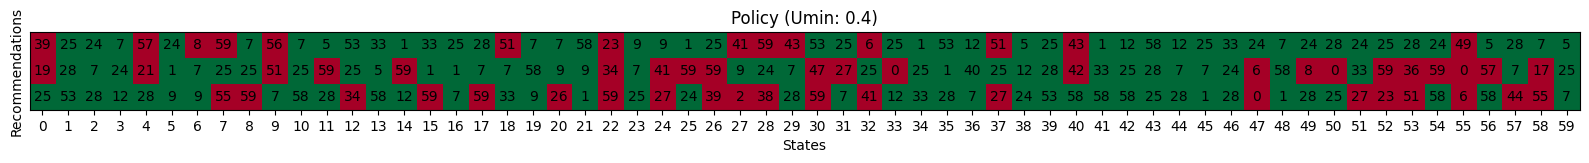

In [ ]:
policy_heatmap(DQN_policy2, list(recApprox2.cashed), recApprox2.u_min)

In [ ]:
# Define parameters for the recommendation system
params = {
    'K': 90,                 # Number of states
    'irrelevance_thres': 0.4, # Irrelevance threshold
    'q': 0.1,                 # Quit probability
    'alpha': 0.8,             # Exploration rate
    'N': 3                   # Number of recommendations to make
}

# Create an instance of the RecomSysApprox class with the defined parameters
recApprox3 = RecomSysApprox(**params)

# Define parameters for training the recommendation system
training_params = {
    'batch_size': 64,      # Batch size for training
    'gamma': 0.99,         # Discount factor
    'num_episodes': 1000,  # Number of training episodes
    'TAU': 0.005           # Soft update parameter for the target network
}

# Train the recommendation system using DQN and collect training statistics
DQN_cost_per_episode3, DQN_policy3 = recApprox3.dqn_train(**training_params)

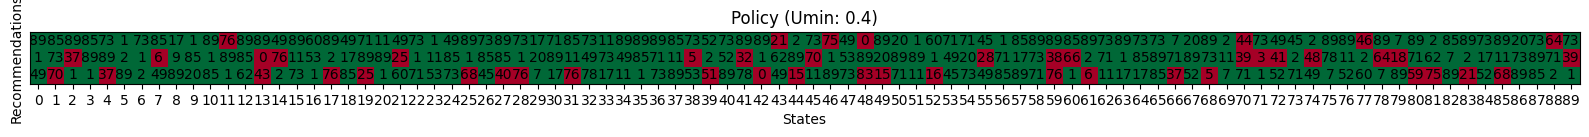

In [ ]:
policy_heatmap(DQN_policy3, list(recApprox3.cashed), recApprox3.u_min)

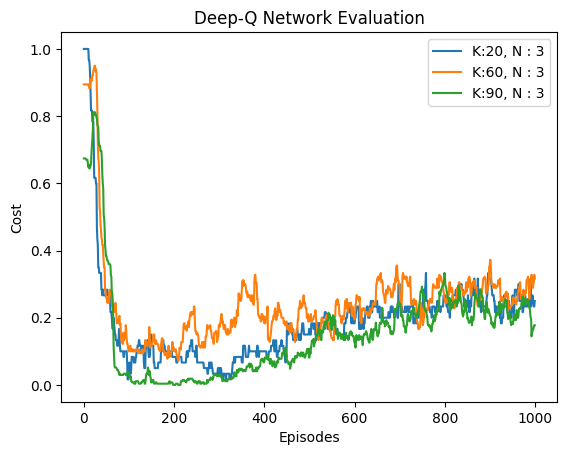

In [ ]:
# Plot the costs for each model
plt.plot(DQN_cost_per_episode, label = f'K:{recApprox.K}, N : {recApprox.N}')
plt.plot(DQN_cost_per_episode2, label = f'K:{recApprox2.K}, N : {recApprox2.N}')
plt.plot(DQN_cost_per_episode3, label = f'K:{recApprox3.K}, N : {recApprox3.N}')

# Set plot title and labels
plt.title('Deep-Q Network Evaluation')
plt.xlabel('Episodes')
plt.ylabel('Cost')

# Add legend
plt.legend()

# Show the plot
plt.show()

<h3>$\textbf{Effect of the session quitting probability (q) on policy}$</h3>

In [ ]:
# Define parameters for the recommendation system
params = {
    'K': 40,                 # Number of states
    'irrelevance_thres': 0.4, # Irrelevance threshold
    'q': 0.1,                 # Quit probability
    'alpha': 0.8,             # Exploration rate
    'N': 3                   # Number of recommendations to make
}

# Create an instance of the RecomSysApprox class with the defined parameters
recApprox = RecomSysApprox(**params)

# Define parameters for training the recommendation system
training_params = {
    'batch_size': 64,      # Batch size for training
    'gamma': 0.99,         # Discount factor
    'num_episodes': 1000,  # Number of training episodes
    'TAU': 0.005           # Soft update parameter for the target network
}

# Train the recommendation system using DQN and collect training statistics
DQN_cost_per_episode, DQN_policy = recApprox.dqn_train(**training_params)


In [ ]:
recApprox.cashed

array([ 0,  5,  8, 14, 30, 31, 33, 39])

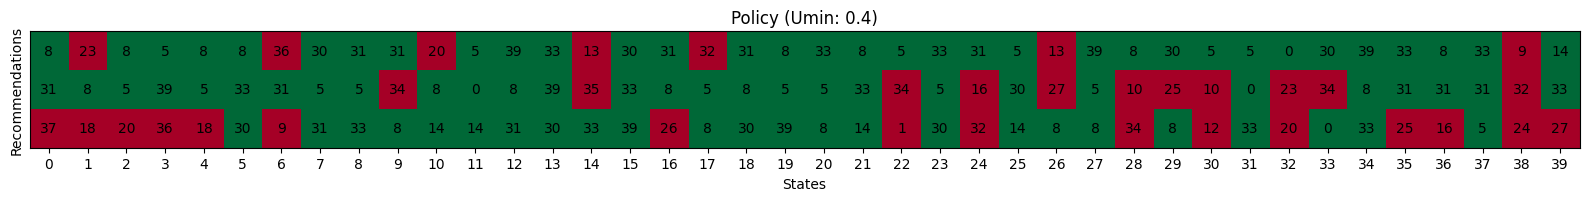

In [ ]:
policy_heatmap(DQN_policy, list(recApprox.cashed), recApprox.u_min)

In [ ]:
# Define parameters for the recommendation system
params = {
    'K': 40,                 # Number of states
    'irrelevance_thres': 0.4, # Irrelevance threshold
    'q': 0.4,                 # Quit probability
    'alpha': 0.8,             # Exploration rate
    'N': 3                   # Number of recommendations to make
}

# Create an instance of the RecomSysApprox class with the defined parameters
recApprox2 = RecomSysApprox(**params)

# Define parameters for training the recommendation system
training_params = {
    'batch_size': 64,      # Batch size for training
    'gamma': 0.99,         # Discount factor
    'num_episodes': 1000,  # Number of training episodes
    'TAU': 0.005           # Soft update parameter for the target network
}

# Train the recommendation system using DQN and collect training statistics
DQN_cost_per_episode2, DQN_policy2 = recApprox2.dqn_train(**training_params)

In [ ]:
recApprox2.cashed

array([ 6,  7, 11, 15, 20, 21, 29, 38])

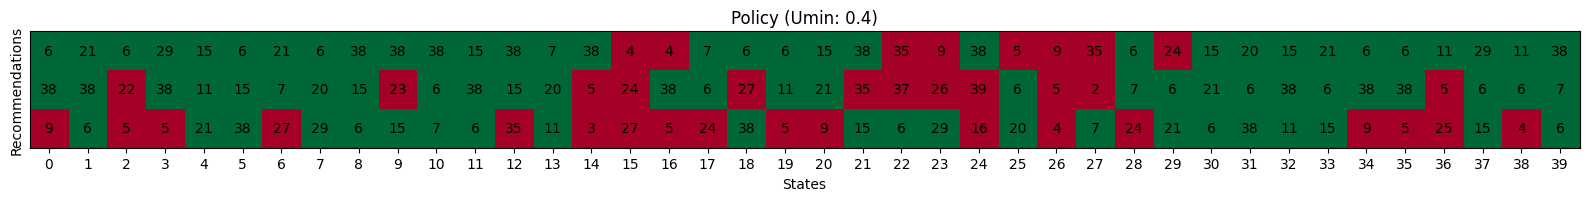

In [ ]:
policy_heatmap(DQN_policy2, list(recApprox2.cashed), recApprox2.u_min)

In [ ]:
# Define parameters for the recommendation system
params = {
    'K': 40,                 # Number of states
    'irrelevance_thres': 0.4, # Irrelevance threshold
    'q': 0.8,                 # Quit probability
    'alpha': 0.8,             # Exploration rate
    'N': 3                   # Number of recommendations to make
}

# Create an instance of the RecomSysApprox class with the defined parameters
recApprox3 = RecomSysApprox(**params)

# Define parameters for training the recommendation system
training_params = {
    'batch_size': 64,      # Batch size for training
    'gamma': 0.99,         # Discount factor
    'num_episodes': 1000,  # Number of training episodes
    'TAU': 0.005           # Soft update parameter for the target network
}

# Train the recommendation system using DQN and collect training statistics
DQN_cost_per_episode3, DQN_policy3 = recApprox3.dqn_train(**training_params)

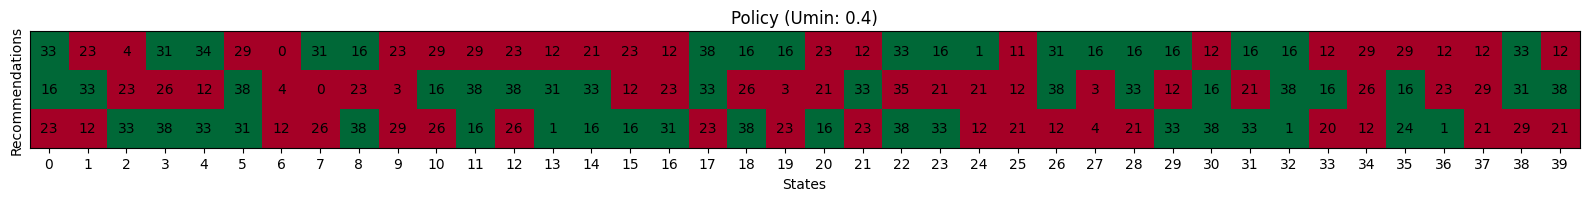

In [ ]:
policy_heatmap(DQN_policy3, list(recApprox3.cashed), recApprox3.u_min)

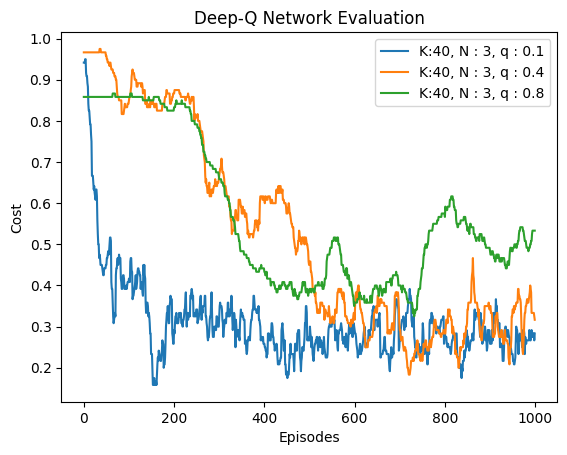

In [ ]:
# Plot the costs for each model
plt.plot(DQN_cost_per_episode, label = f'K:{recApprox.K}, N : {recApprox.N}, q : {recApprox.q}')
plt.plot(DQN_cost_per_episode2, label = f'K:{recApprox2.K}, N : {recApprox2.N}, q : {recApprox2.q}')
plt.plot(DQN_cost_per_episode3, label = f'K:{recApprox3.K}, N : {recApprox3.N}, q : {recApprox3.q}')

# Set plot title and labels
plt.title('Deep-Q Network Evaluation')
plt.xlabel('Episodes')
plt.ylabel('Cost')

# Add legend
plt.legend()

# Show the plot
plt.show()

<h3>$\textbf{Large Scale Convergence Experiments}$</h3>

In [ ]:
# Define parameters for the recommendation system
params = {
    'K': 200,                 # Number of states
    'irrelevance_thres': 0.2, # Irrelevance threshold
    'q': 0.1,                 # Quit probability
    'alpha': 0.8,             # Exploration rate
    'N': 5                  # Number of recommendations to make
}

# Create an instance of the RecomSysApprox class with the defined parameters
recApproxlarge1 = RecomSysApprox(**params)

# Define parameters for training the recommendation system
training_params = {
    'batch_size': 64,      # Batch size for training
    'gamma': 0.99,         # Discount factor
    'num_episodes': 2000,  # Number of training episodes
    'TAU': 0.005           # Soft update parameter for the target network
}

# Record the starting time
start_time = time.time()

# Train the recommendation system using DQN and collect training statistics
DQN_cost_per_episode, DQN_policy = recApproxlarge1.dqn_train(**training_params)

# Record the ending time
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time
minutes, seconds = divmod(elapsed_time, 60)

In [ ]:
# Define parameters for the recommendation system
params = {
    'K': 500,                 # Number of states
    'irrelevance_thres': 0.2, # Irrelevance threshold
    'q': 0.1,                 # Quit probability
    'alpha': 0.8,             # Exploration rate
    'N': 5                 # Number of recommendations to make
}

# Create an instance of the RecomSysApprox class with the defined parameters
recApproxlarge2 = RecomSysApprox(**params)

# Define parameters for training the recommendation system
training_params = {
    'batch_size': 64,      # Batch size for training
    'gamma': 0.99,         # Discount factor
    'num_episodes': 2000,  # Number of training episodes
    'TAU': 0.005           # Soft update parameter for the target network
}

# Record the starting time
start_time2 = time.time()

# Train the recommendation system using DQN and collect training statistics
DQN_cost_per_episode2, DQN_policy2 = recApproxlarge2.dqn_train(**training_params)

# Record the ending time
end_time2 = time.time()

# Calculate the elapsed time
elapsed_time2 = end_time2 - start_time2
minutes2, seconds2 = divmod(elapsed_time2, 60)

In [ ]:
# Define parameters for the recommendation system
params = {
    'K': 1000,                 # Number of states
    'irrelevance_thres': 0.2, # Irrelevance threshold
    'q': 0.1,                 # Quit probability
    'alpha': 0.8,             # Exploration rate
    'N': 5                # Number of recommendations to make
}

# Create an instance of the RecomSysApprox class with the defined parameters
recApproxlarge3 = RecomSysApprox(**params)

# Define parameters for training the recommendation system
training_params = {
    'batch_size': 64,      # Batch size for training
    'gamma': 0.99,         # Discount factor
    'num_episodes': 2000,  # Number of training episodes
    'TAU': 0.005           # Soft update parameter for the target network
}

# Record the starting time
start_time3 = time.time()

# Train the recommendation system using DQN and collect training statistics
DQN_cost_per_episode3, DQN_policy3 = recApproxlarge3.dqn_train(**training_params)

# Record the ending time
end_time3 = time.time()

# Calculate the elapsed time
elapsed_time3 = end_time3 - start_time3
minutes3, seconds3 = divmod(elapsed_time3, 60)

In [ ]:
print(f"The elapsed time for K = {recApproxlarge1.K}, N = {recApproxlarge1.N} is {int(minutes)} min and {int(seconds)} secs.")
print(f"The elapsed time K = {recApproxlarge2.K}, N = {recApproxlarge2.N} is {int(minutes2)} min and {int(seconds2)} secs.")
print(f"The elapsed time K = {recApproxlarge3.K}, N = {recApproxlarge3.N} is {int(minutes3)} min and {int(seconds3)} secs.")

The elapsed time for K = 200, N = 5 is 2 min and 39 secs.
The elapsed time K = 500, N = 5 is 5 min and 18 secs.
The elapsed time K = 1000, N = 5 is 10 min and 5 secs.


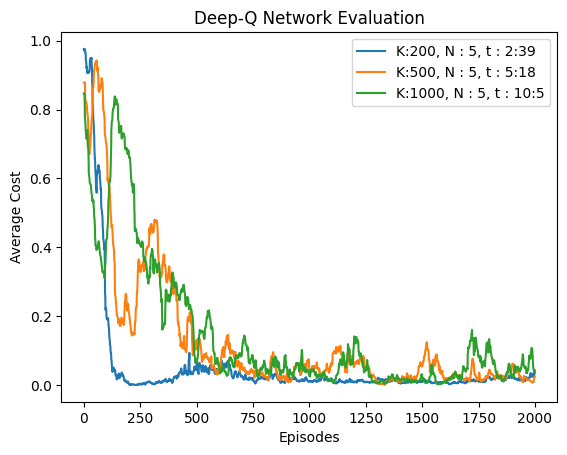

In [ ]:
# Plot the costs for each model
plt.plot(DQN_cost_per_episode, label = f'K:{recApproxlarge1.K}, N : {recApproxlarge1.N}, t : {int(minutes)}:{int(seconds)}')
plt.plot(DQN_cost_per_episode2, label = f'K:{recApproxlarge2.K}, N : {recApproxlarge2.N}, t : {int(minutes2)}:{int(seconds2)}')
plt.plot(DQN_cost_per_episode3, label = f'K:{recApproxlarge3.K}, N : {recApproxlarge3.N}, t : {int(minutes3)}:{int(seconds3)}')

# Set plot title and labels
plt.title('Deep-Q Network Evaluation')
plt.xlabel('Episodes')
plt.ylabel('Average Cost')

# Add legend
plt.legend()

# Show the plot
plt.show()